## Data Description

# Dataset Overview:
- Contains 10 years of daily weather data from various locations in Australia.
- Aim is to predict if it will rain the next day (Yes/No) based on the variable "RainTomorrow."

# Source:
- Data created by Adam Young.
- Obtained from Kaggle with guidance from tutor Mr. Bibek Khannal.
- Source of daily observations: [Bureau of Meteorology](http://www.bom.gov.au/climate/data).

# Details:
- "RainTomorrow" is marked as Yes if rainfall is 1mm or more.
- Observations from multiple weather stations.

# Copyright:
- Copyright belongs to Commonwealth of Australia 2010, Bureau of Meteorology.

# Last Checked:
- Dataset last checked on December 21, 2023.


In [1]:
# Import necessary libraries
import pandas as pd

weather_data = pd.read_csv('./data/weatherAUS.csv')

# Display basic information about the dataset
print(weather_data.info(memory_usage=True))

# Display summary statistics
print(weather_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Data Cleaning

In [2]:
import pandas as pd

# Read the weather dataset from the provided CSV file
weather_data = pd.read_csv('./data/weatherAUS.csv')

# Impute missing values in temperature and humidity columns with mean values
numeric_columns_to_impute = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm', "Cloud3pm", "Cloud9am", "Sunshine", "Evaporation"]
categorical_columns_to_impute = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

for column in numeric_columns_to_impute:
    weather_data[column].fillna(weather_data[column].mean(), inplace=True)

for column in categorical_columns_to_impute:
    weather_data[column].fillna(weather_data[column].mode()[0], inplace=True)

# Remove duplicate entries
weather_data.drop_duplicates(inplace=True)

# Additional cleaning: Convert date-related columns to a consistent format
weather_data['Date'] = pd.to_datetime(weather_data['Date'], format='%Y-%m-%d')

# Display the cleaned dataset
print(weather_data.head())

# Summary Statistics
numeric_summary = weather_data.describe()

# Unique values in categorical columns
unique_locations = weather_data['Location'].unique()
unique_wind_directions = weather_data[['WindGustDir', 'WindDir9am', 'WindDir3pm']].stack().unique()

print("Summary Statistics:")
print(numeric_summary)

print("\nUnique Locations:")
print(unique_locations)

print("\nUnique Wind Directions:")
print(unique_wind_directions)

# Mode of Categorical Variables
mode_location = weather_data['Location'].mode()[0]
mode_wind_direction = weather_data[['WindGustDir', 'WindDir9am', 'WindDir3pm']].mode().iloc[0]
print("\nMode of Location:", mode_location)
print("Mode of Wind Directions:")
print(mode_wind_direction)

# Time Period Spanned by Date Variables
time_period_span = weather_data['Date'].max() - weather_data['Date'].min()
print("\nTime Period Spanned by Date Variables:", time_period_span)


        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6     5.468232  7.611178   
1 2008-12-02   Albury      7.4     25.1       0.0     5.468232  7.611178   
2 2008-12-03   Albury     12.9     25.7       0.0     5.468232  7.611178   
3 2008-12-04   Albury      9.2     28.0       0.0     5.468232  7.611178   
4 2008-12-05   Albury     17.5     32.3       1.0     5.468232  7.611178   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       100

## Univariate Analysis

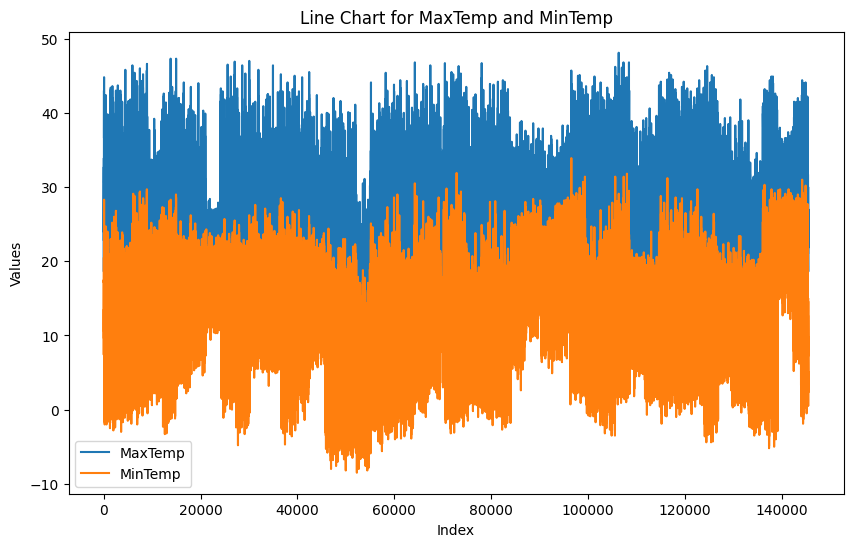

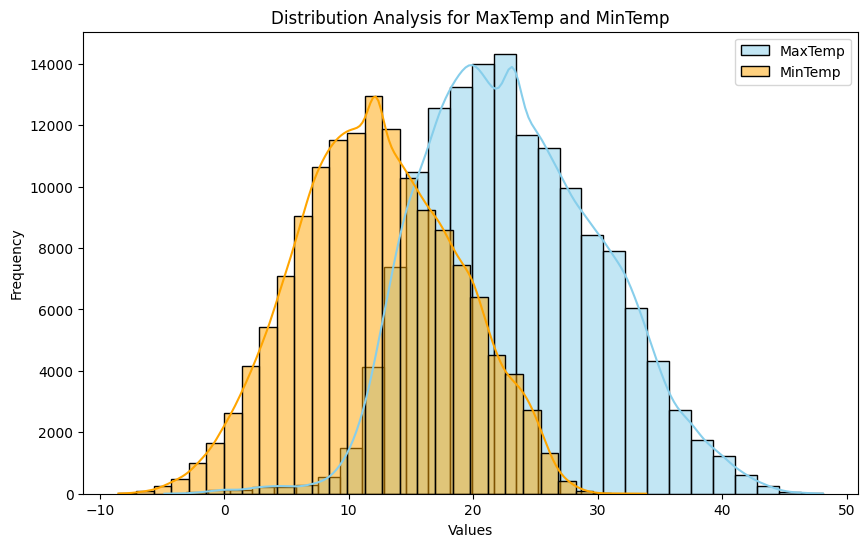

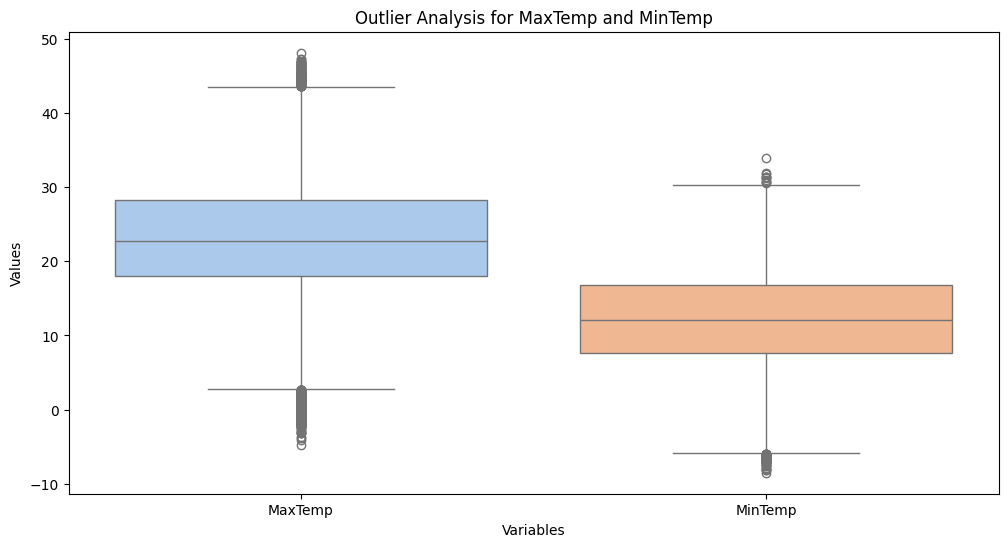

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select two variables for analysis
variable1 = 'MaxTemp'
variable2 = 'MinTemp'

# Line Chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=weather_data.index, y=weather_data[variable1], label=variable1)
sns.lineplot(x=weather_data.index, y=weather_data[variable2], label=variable2)
plt.title('Line Chart for {} and {}'.format(variable1, variable2))
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

# Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(weather_data[variable1], bins=30, kde=True, label=variable1, color='skyblue')
sns.histplot(weather_data[variable2], bins=30, kde=True, label=variable2, color='orange')
plt.title('Distribution Analysis for {} and {}'.format(variable1, variable2))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Outlier Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=weather_data[[variable1, variable2]], palette='pastel')
plt.title('Outlier Analysis for {} and {}'.format(variable1, variable2))
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()


### Bivariate Analysis

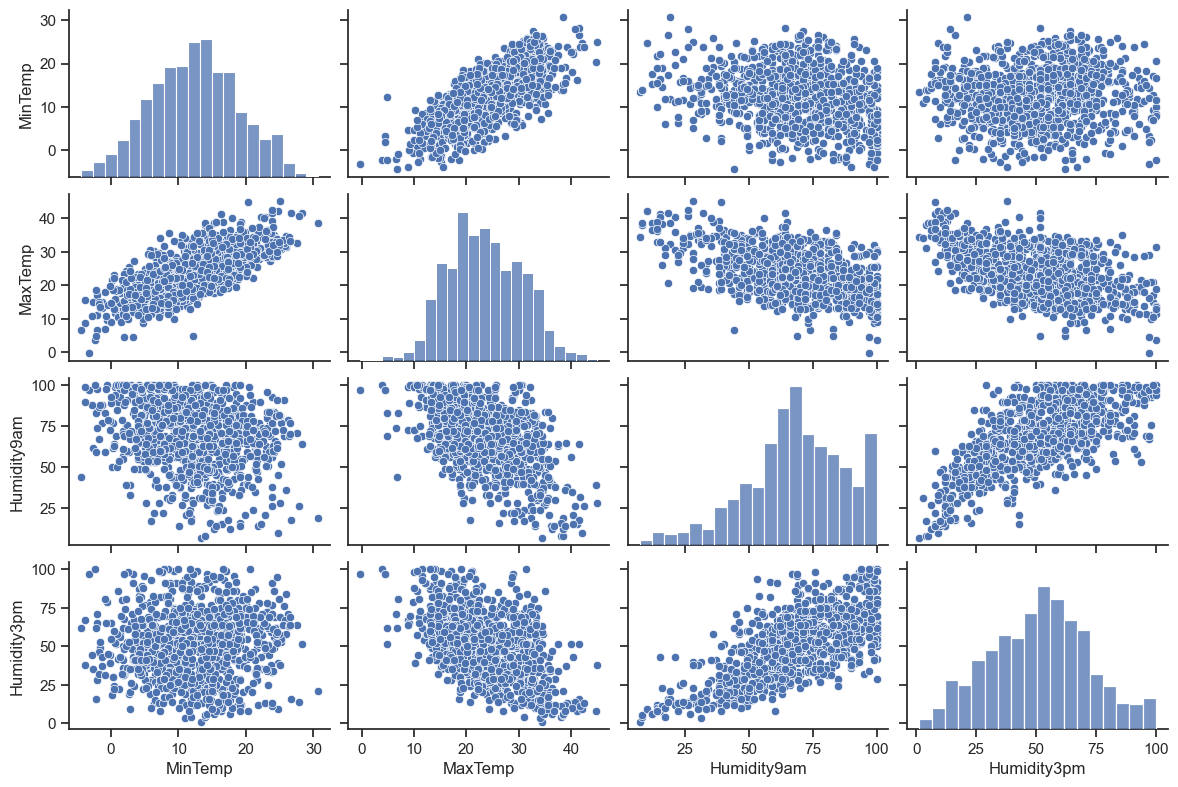

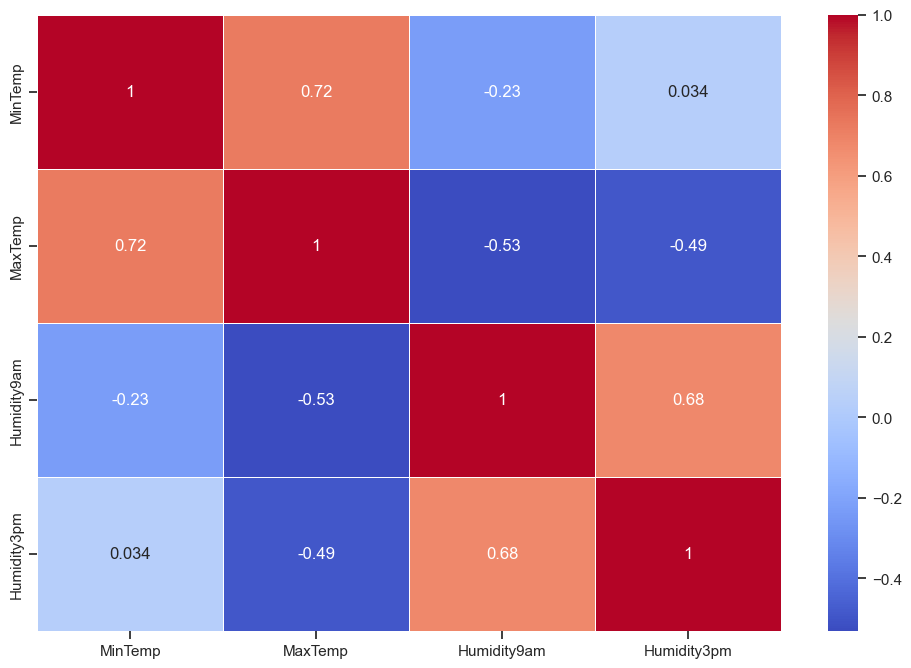

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the weather dataset from the provided CSV file
weather_data = pd.read_csv('./data/weatherAUS.csv')

# Impute missing values in temperature and humidity columns with mean values
columns_to_impute = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm']
weather_data[columns_to_impute] = weather_data[columns_to_impute].apply(lambda x: x.fillna(x.mean()))

# Remove duplicate entries
weather_data.drop_duplicates(inplace=True)

# Additional cleaning: Convert date-related columns to a consistent format
weather_data['Date'] = pd.to_datetime(weather_data['Date'], format='%Y-%m-%d')

# Categorical data cleaning: Handling missing values in categorical columns
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
weather_data[categorical_columns] = weather_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Subsample to include, for example, 1000 rows
subsampled_data = weather_data.sample(n=1000, random_state=42)

# Bi-variate Analysis for Numeric Columns
selected_numeric_columns = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm']
numeric_columns = subsampled_data[selected_numeric_columns]
sns.set(style="ticks", color_codes=True)

# Scatter plot with pairplot
sns.pairplot(numeric_columns, height=2, aspect=1.5)
plt.savefig('./scatter_plot.png')
plt.show()

# Correlation heatmap
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.savefig('./correlation_heatmap.png')
plt.show()
